In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
file = pd.ExcelFile('/Users/lirving/jamaican-salaries-2017/The-Great-Jamaican-Salary-Survey-report.xlsx')

In [80]:
print(file.sheet_names)

['results']


In [81]:
survey = file.parse('results')

In [82]:
#Inspect data

survey.head()

,#,Which age group do you belong to?,Which gender do you identify with?,What is your highest level of education?,Have you received any educational/professional qualifications from an institution outside of Jamaica?,Which field are you working in?,How much experience do you have in your field?,How long have you been in your current role?,What is your current net (take home) monthly salary?,Lunch allowance,...,Select the rank of your current position,Other.1,Are you able to comfortably meet your BASIC living expenses with your current income?,"After taking care of your basic living expenses, would you say you have enough left over to take care of the fun stuff (eating out, entertainment, leisure, treating yourself, etc.)?",Do you have a general idea of what salaries are like in your field?,Select the statement that best describes your attitude towards your salary.,How satisfied are you with your current salary?,Start Date (UTC),Submit Date (UTC),Network ID
0,1fd874a48fe48854960e8950861355d7,25 - 30,Man,Bachelor's Degree,0,Information Technology,5 - 7 years,5 - 6 years,"$150,001 - $170,000",NaN,...,Supervisory,NaN,1,1,1,"I believe that I am underpaid, considering my ...",5,2017-01-03 21:59:45,2017-01-03 22:01:23,7c06774c6c
1,9b560ff8316bc41d453045780ba37f58,18 - 24,Woman,Bachelor's Degree,0,Customer Service and Call Centres,0 - 2 years,Less than 1 year,"$70,001 - $90,000",NaN,...,Entry level,NaN,1,1,1,"I believe that I am underpaid, considering my ...",5,2017-01-03 21:59:53,2017-01-03 22:01:48,58ca3ef9e1
2,6c8b59b47ce982811f8a43e2deb78480,31 - 35,Woman,Bachelor's Degree,0,Creative Services,7 - 9 years,9 - 10 years,"$230,001 - $250,000",Lunch allowance,...,Supervisory,NaN,0,0,1,"I believe that I am underpaid, considering my ...",5,2017-01-03 22:01:09,2017-01-03 22:03:20,5345e02efc
3,d571a15b7786263e920d4c347cba83c4,18 - 24,Woman,Postgraduate Certification,0,Marketing,3 - 5 years,Less than 1 year,"$130,001 - $150,000",NaN,...,Entry level,NaN,1,0,0,"I believe that I am adequately paid, consideri...",5,2017-01-03 22:01:38,2017-01-03 22:03:25,7a079f8e29
4,d2b2bc421b6d67368cde060ea89f9ce3,35 - 40,Man,Master's Degree,1,Information Technology,Over 9 years,9 - 10 years,"$190,001 - $210,000",NaN,...,Supervisory,NaN,1,1,1,"I believe that I am underpaid, considering my ...",6,2017-01-03 22:01:15,2017-01-03 22:04:15,3ac97c1eaa


In [83]:
#Combine benefits into one column
survey['benefits']= 0
survey.loc[survey['None'].isnull(),'benefits']=1

survey = survey.drop(['Lunch allowance', 'Vehicle maintenance ', 'Clothing allowance', 'Health insurance', 
                      'Cell phone','None', 'Other'],axis=1)

In [84]:
#Delete other unnecessary columns
survey = survey.drop (['#','Start Date (UTC)','Submit Date (UTC)','Other.1', 'Network ID'], axis=1)

In [85]:
#Rename remaining columns
survey.columns = ['age','gender','education','foreign_edu','field','experience','time_current_role','monthly_salary',
                  'job_level','basic_expenses', 'entertainment', 'salary_knowledge', 'outlook', 'salary_satisfaction',
                  'benefits']


In [86]:
#Fill in missing values
survey['job_level'].fillna('Other', inplace=True) 

In [87]:
survey['age']= survey['age'].replace({'36 - 40':'35 - 40', '46 - 50':'45 - 50', '56 - 60':'55 - 60'})

In [88]:
survey['gender']= survey['gender'].replace({'Man': 'Male', 'Woman':'Female'})

In [89]:
survey['outlook']= survey['outlook'].replace({'I believe that I am underpaid, considering my skills, qualifications and experience.':'underpaid',
                          'I believe that I am adequately paid, considering my skills, qualifications and experience.':'adequately_paid',
                          'I believe that I am generously paid, considering my skills, qualifications and experience.':'generously_paid',
                          'I believe that I am vastly overpaid, considering my skills, qualifications and experience.':'overpaid'})

In [90]:
#Change variables to appropriate data types
survey['age'] = survey['age'].astype('category')
survey['gender'] = survey['gender'].astype('category')
survey['education'] = survey['education'].astype('category')
survey['field'] = survey['field'].astype('category')
survey['experience'] = survey['experience'].astype('category')
survey['outlook'] = survey['outlook'].astype('category')
survey['job_level'] = survey['job_level'].astype('category')

In [91]:
survey['time_current_role'] = pd.Categorical(survey['time_current_role'],['Less than 1 year','1 - 2 years','3 - 4 years',
                                                                          '5 - 6 years','7 - 8 years','9 - 10 years',
                                                                          'Over 10 years'], ordered=True)

In [92]:
survey['monthly_salary']= pd.Categorical(survey['monthly_salary'],['Under $30,000', '$30,000 - 50,000','$50,001 - $70,000', 
                                                                   '$70,001 - $90,000','$90,001 - $110,000','$110,001 - 130,000',
                                                                   '$130,001 - $150,000','$150,001 - $170,000','$170,001 - $190,000',
                                                                   '$190,001 - $210,000','$210,000 - $230,000','$230,001 - $250,000',
                                                                   '$250,001 - $270,000','$270,001 - $290,000','$290,001 - $310,000',
                                                                   '$310,000 - $330,000', '$330,001 - $350,000','$350,001 - $370,000', 
                                                                   '$370,001 - $390,000', '$390,001 - $410,000', '$410,001 - $430,000', 
                                                                   '$430,001 - $450,000', '$450,001 - $470,000', '$470,001 - $490,000', 
                                                                   '$490,001 - $510,000', 'Over $510,000' ], ordered=True)

In [93]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 15 columns):
age                    745 non-null category
gender                 745 non-null category
education              745 non-null category
foreign_edu            745 non-null int64
field                  745 non-null category
experience             745 non-null category
time_current_role      745 non-null category
monthly_salary         745 non-null category
job_level              745 non-null category
basic_expenses         745 non-null int64
entertainment          745 non-null int64
salary_knowledge       745 non-null int64
outlook                745 non-null category
salary_satisfaction    745 non-null int64
benefits               745 non-null int64
dtypes: category(9), int64(6)
memory usage: 46.5 KB


In [94]:
survey.head()

,age,gender,education,foreign_edu,field,experience,time_current_role,monthly_salary,job_level,basic_expenses,entertainment,salary_knowledge,outlook,salary_satisfaction,benefits
0,25 - 30,Male,Bachelor's Degree,0,Information Technology,5 - 7 years,5 - 6 years,"$150,001 - $170,000",Supervisory,1,1,1,underpaid,5,1
1,18 - 24,Female,Bachelor's Degree,0,Customer Service and Call Centres,0 - 2 years,Less than 1 year,"$70,001 - $90,000",Entry level,1,1,1,underpaid,5,0
2,31 - 35,Female,Bachelor's Degree,0,Creative Services,7 - 9 years,9 - 10 years,"$230,001 - $250,000",Supervisory,0,0,1,underpaid,5,1
3,18 - 24,Female,Postgraduate Certification,0,Marketing,3 - 5 years,Less than 1 year,"$130,001 - $150,000",Entry level,1,0,0,adequately_paid,5,0
4,35 - 40,Male,Master's Degree,1,Information Technology,Over 9 years,9 - 10 years,"$190,001 - $210,000",Supervisory,1,1,1,underpaid,6,1


## Univariate Analysis

### Gender

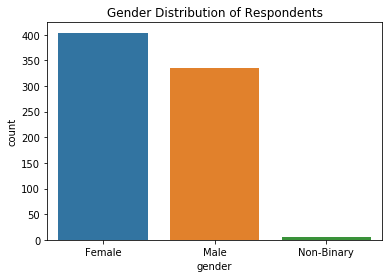

In [18]:
sns.countplot(survey['gender'])
plt.title('Gender Distribution of Respondents');

As can be seen in the histogram above, there are slightly more female respondents than male. 

Females account for **54%** of respondents and males account for **45%** of respondents.

### Age

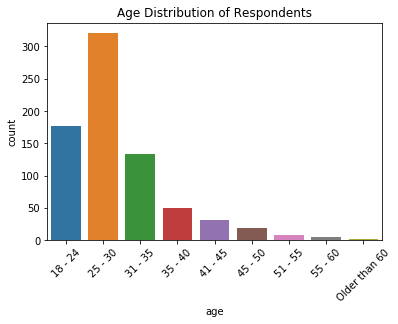

In [19]:
sns.countplot(survey['age'])
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=45);

More than half of the respondents fall in the **18-35** age range.

### Education

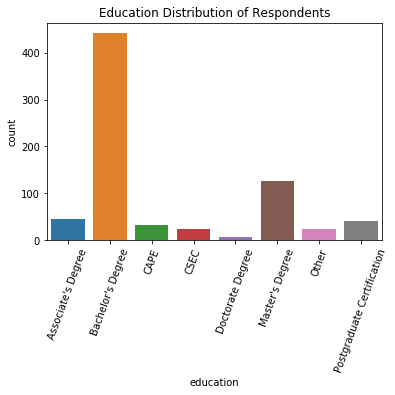

In [20]:
sns.countplot(survey['education'])
plt.title('Education Distribution of Respondents')
plt.xticks(rotation=70);

Majority of respondents' highest level of education is a **Bachelor's Degree**.

### Job Level

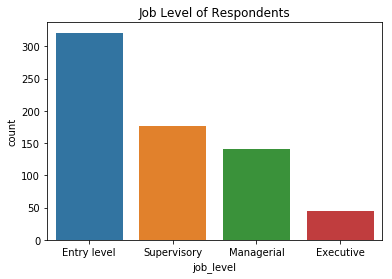

In [21]:
sns.countplot(survey['job_level'])
plt.title('Job Level of Respondents');

Majority of respondents are in an **Entry Level position**.

### Time Spent in Current Role

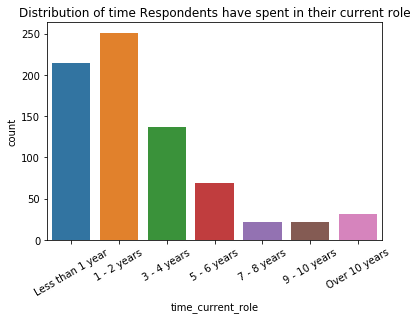

In [22]:
sns.countplot(survey['time_current_role'])
plt.title('Distribution of time Respondents have spent in their current role')
plt.xticks(rotation=30);

Majortiy of respondents have been in their current role for **less than 2 years**.

### Monthly Salary

$50,001 - $70,000      94
$90,001 - $110,000     85
$70,001 - $90,000      82
$110,001 - 130,000     71
$130,001 - $150,000    54
$30,000 - 50,000       51
$190,001 - $210,000    44
$150,001 - $170,000    41
$170,001 - $190,000    36
$210,000 - $230,000    32
Name: monthly_salary, dtype: int64

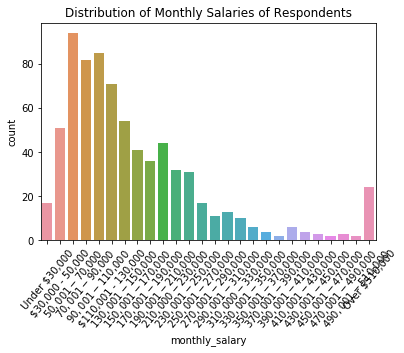

In [23]:
sns.countplot(survey['monthly_salary'])
plt.title('Distribution of Monthly Salaries of Respondents')
plt.xticks(rotation=50);

survey['monthly_salary'].value_counts(sort=True, ascending=False).head(10)

Majority of respondents earn a monthly salary in the range ** \$50,000 - $110,000**.

### Field

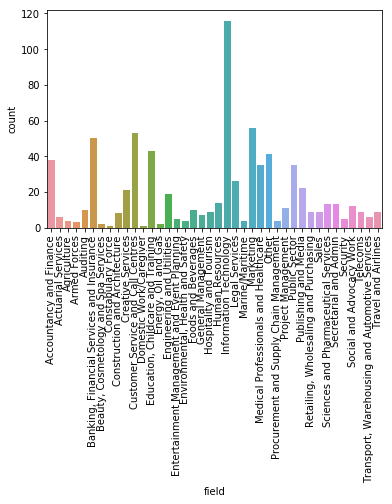

In [44]:
sns.countplot(survey['field'])
plt.xticks(rotation=90);

In [47]:
top_fields = survey['field'].value_counts(sort=True, ascending=False).head(10)
print('The most common fields are: \n\n{}'.format(top_fields)) 

The most common fields are: 

Information Technology                       116
Marketing                                     56
Customer Service and Call Centres             53
Banking, Financial Services and Insurance     50
Education, Childcare and Training             43
Other                                         41
Accountancy and Finance                       38
Medical Professionals and Healthcare          35
Public Sector                                 35
Legal Services                                26
Name: field, dtype: int64


### Experience in Field

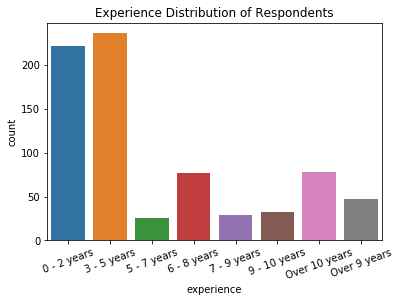

In [25]:
sns.countplot(survey['experience'])
plt.title('Experience Distribution of Respondents')
plt.xticks(rotation=20);

Majority of respondents have **less than 5 years of experience** in their field.

### Benefits

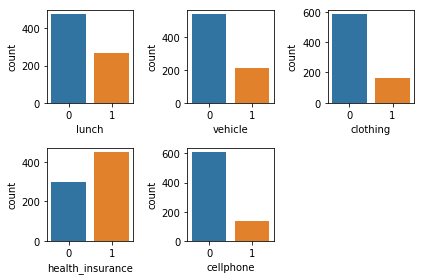

In [26]:
plt.subplot(2,3,1)
sns.countplot(survey['lunch'])

plt.subplot(2,3,2)
sns.countplot(survey['vehicle'])

plt.subplot(2,3,3)
sns.countplot(survey['clothing'])

plt.subplot(2,3,4)
sns.countplot(survey['health_insurance'])

plt.subplot(2,3,5)
sns.countplot(survey['cellphone'])

#plt.subplot(2,3,6)
#sns.countplot(survey['other_benefits'])

plt.tight_layout()


### Expenses 

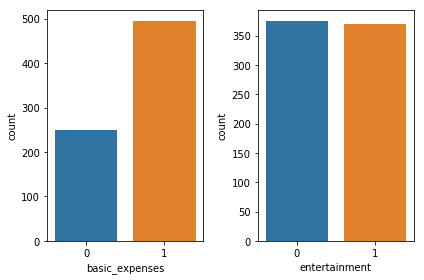

In [27]:
plt.subplot(1,2,1)
sns.countplot(survey['basic_expenses'])

plt.subplot(1,2,2)
sns.countplot(survey['entertainment'])

plt.tight_layout()

While most respondents are able to cover their basic expenses, it is approximately 50/50 on whether the average respondent can afford "fun stuff" (i.e. eating out, entertainment, leisure, etc.)

### Salary Knowledge

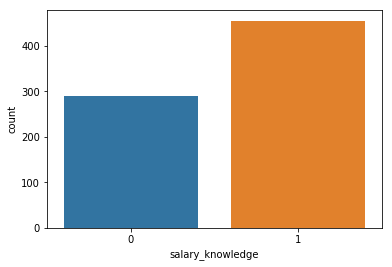

In [28]:
sns.countplot(survey['salary_knowledge']);

**Two thirds** of respondents have a general idea of what the salaries are like in their field.

### Perception of Salary

underpaid          451
adequately_paid    256
generously_paid     33
overpaid             5
Name: outlook, dtype: int64

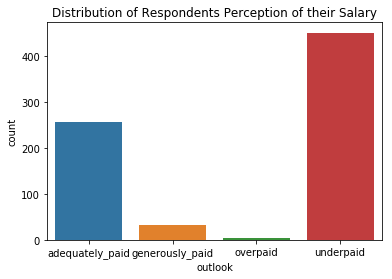

In [29]:
sns.countplot(survey['outlook'])
plt.title('Distribution of Respondents Perception of their Salary');
survey['outlook'].value_counts()

Majority of respondents feel they are either **underpaid** or **adequately paid**.

61% of respondents said they were underpaid compared to 34% who said they were adequately paid.

### Salary Satisfaction

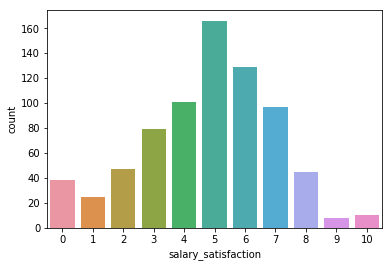

In [30]:
sns.countplot(survey['salary_satisfaction']);

## Bivariate Analysis

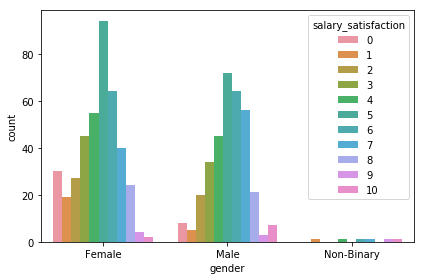

In [31]:
sns.countplot(x='gender', hue='salary_satisfaction', data=survey)
plt.tight_layout()

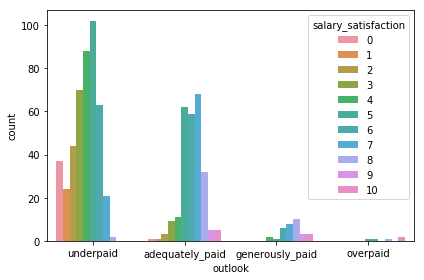

In [76]:
sns.countplot(x='outlook', hue='salary_satisfaction', data=survey)
plt.tight_layout()

## Feature Selection

In [98]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['age','gender','field','education','experience','time_current_role','monthly_salary','job_level','outlook']
le = LabelEncoder()
for i in var_mod:
    survey[i] = le.fit_transform(survey[i])

In [99]:
from sklearn.model_selection import train_test_split



X = survey.drop('salary_satisfaction',axis=1)
y = survey['salary_satisfaction']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 3)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False False False False False False False  True  True False
 False  True]
Feature Ranking: [ 7  3  4  5 12  8 10 11  9  1  1  6  2  1]


In [119]:
X_train.columns

Index(['age', 'gender', 'education', 'foreign_edu', 'field', 'experience',
       'time_current_role', 'monthly_salary', 'job_level', 'basic_expenses',
       'entertainment', 'salary_knowledge', 'outlook', 'benefits'],
      dtype='object')

## Conclusion

* The factors most correlated with salary satisfaction for Jamaican employees are:
    1. Being able to afford "fun stuff" (i.e. eating out, entertainment, leisure, etc.) after caring for basic      expenses
    2. General knowledge of salary range in their field
    3. Benefits